# Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Import The Dataset

In [2]:
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
dataset = pd.read_csv(url)

dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
dataset.drop(columns='customerID', axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
dataset.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [5]:
dataset.shape

(7043, 21)

# Turning TotalCharges Object Value To Numerical

In [6]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [7]:
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean())

# Using Encoding To Turn Object/Str Values To Int

In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [10]:
category_col = dataset.select_dtypes(include='object').columns

for col in category_col:
  le = LabelEncoder()
  dataset[col] = le.fit_transform(dataset[col])


dataset.shape

(7043, 21)

In [11]:
dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1


# Visulizing The Data

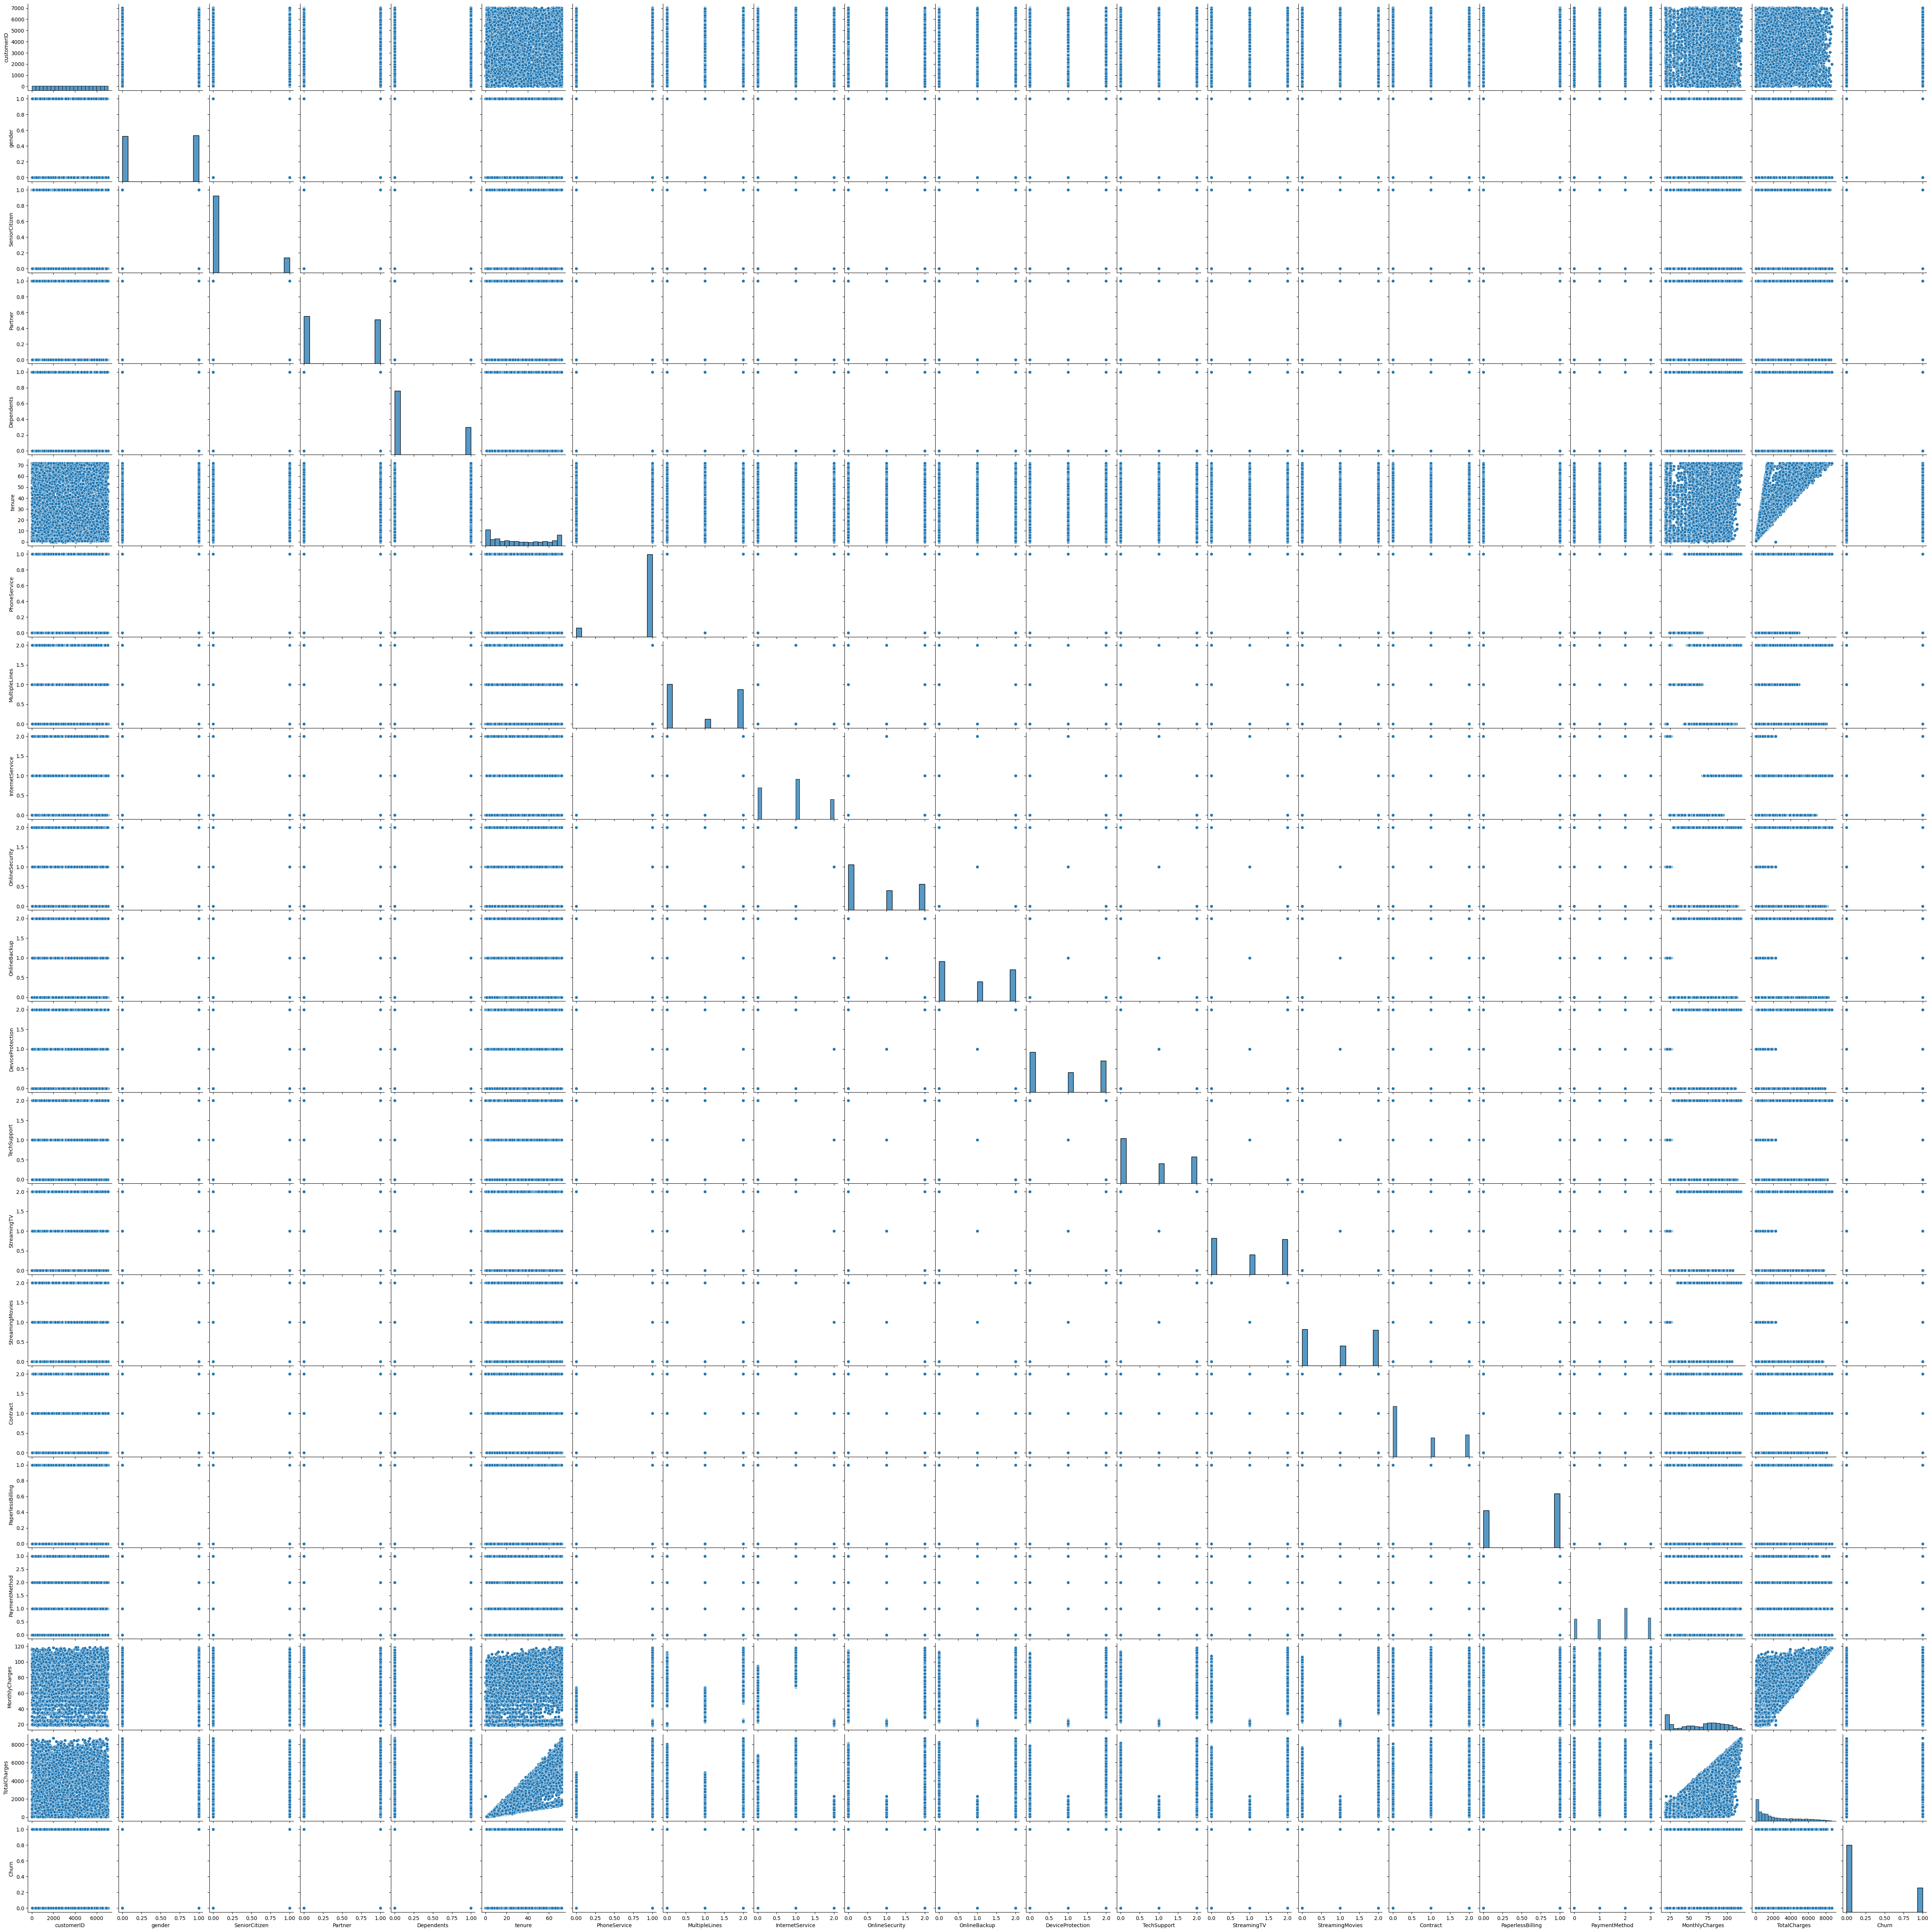

In [12]:
sns.pairplot(dataset)

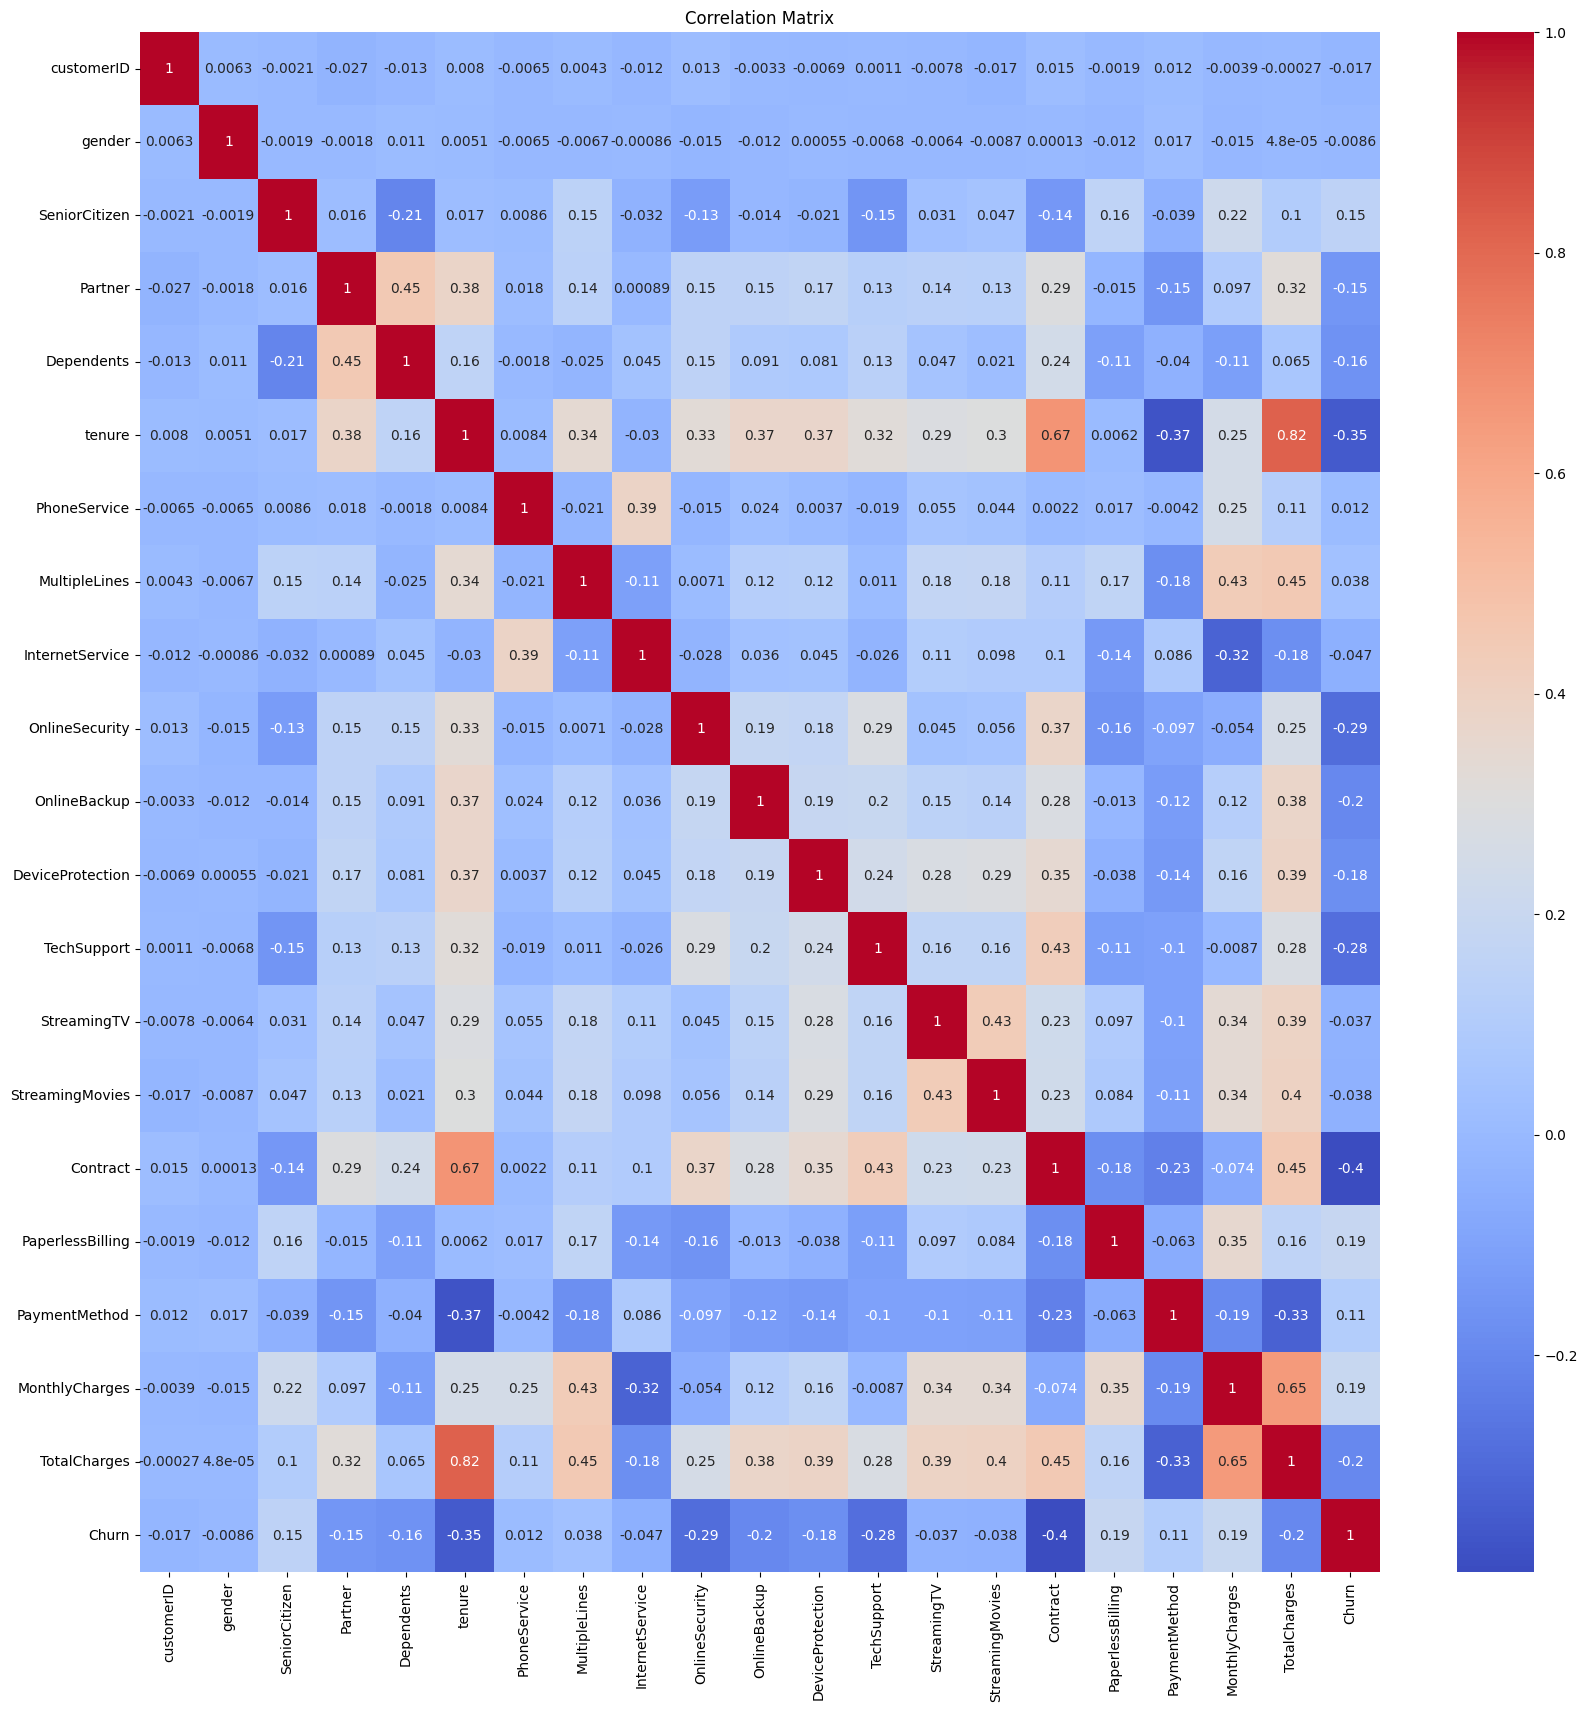

In [13]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True , cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Seperate features and target

In [14]:
X = dataset.drop(columns='Churn' , axis=1)
y = dataset['Churn']

In [15]:
y.value_counts()

,count
Churn,
0,5174
1,1869


# Handling Imbalance Target Value

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
ro = SMOTE(random_state=42)
X,y = ro.fit_resample(X,y)

In [18]:
y.value_counts()

,count
Churn,
0,5174
1,5174


In [19]:
X.shape , y.shape

((10348, 20), (10348,))

# Split Data In Training And Testing

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Feature Scaling The Features

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
X_train =pd.DataFrame( StandardScaler().fit_transform(X_train) , columns=X_train.columns)
X_test =pd.DataFrame( StandardScaler().fit_transform(X_test) , columns=X_test.columns)

In [24]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.427953,-0.856936,2.563913,-0.778744,-0.517573,-1.121289,0.36411,1.210772,-1.171776,-0.749551,-0.880954,-0.875864,-0.757354,-1.024025,-1.031411,-0.642476,-1.179450,1.476529,-0.621754,-0.920294
1,0.236606,-0.856936,-0.390029,-0.778744,-0.517573,-0.659680,0.36411,-0.960304,1.759169,0.489670,0.292234,0.299051,0.475804,0.111677,0.108968,0.674289,-1.179450,1.476529,-1.730911,-0.838481
2,0.834498,-0.856936,-0.390029,-0.778744,-0.517573,-0.995396,0.36411,-0.960304,0.293696,-0.749551,-0.880954,0.299051,0.475804,0.111677,0.108968,-0.642476,-1.179450,-1.554145,1.012179,-0.758965
3,-1.047899,-0.856936,-0.390029,-0.778744,-0.517573,-1.079325,0.36411,-0.960304,0.293696,-0.749551,-0.880954,-0.875864,-0.757354,-1.024025,-1.031411,-0.642476,0.847852,0.466304,0.179354,-0.854894
4,-0.066529,-0.856936,-0.390029,-0.778744,-0.517573,0.515324,0.36411,-0.960304,-1.171776,1.728892,1.465422,-0.875864,-0.757354,1.247379,-1.031411,-0.642476,-1.179450,1.476529,-0.105330,0.243749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8273,0.517561,1.166949,-0.390029,1.284118,1.932095,1.858186,0.36411,1.210772,-1.171776,1.728892,1.465422,1.473966,1.708962,1.247379,1.249348,1.991054,0.847852,1.476529,0.757150,1.984017
8274,0.367226,-0.856936,-0.390029,1.284118,1.932095,-0.198071,0.36411,1.210772,-1.171776,1.728892,1.465422,1.473966,1.708962,1.247379,1.249348,1.991054,0.847852,-0.543920,0.817488,0.065753
8275,0.879352,1.166949,2.563913,-0.778744,-0.517573,-0.659680,0.36411,1.210772,0.293696,-0.749551,-0.880954,1.473966,-0.757354,1.247379,1.249348,-0.642476,0.847852,0.466304,1.113855,-0.392505
8276,-0.067022,1.166949,-0.390029,-0.778744,-0.517573,-0.072178,0.36411,-0.960304,1.759169,0.489670,0.292234,0.299051,0.475804,0.111677,0.108968,0.674289,-1.179450,-0.543920,-1.713164,-0.733552


# Train The Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

In [26]:
lgb = LGBMClassifier( max_depth=7 , learning_rate=0.005, n_estimators=300)
lgb.fit(X_train , y_train)

[LightGBM] [Info] Number of positive: 4125, number of negative: 4153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498309 -> initscore=-0.006765
[LightGBM] [Info] Start training from score -0.006765


LGBMClassifier(learning_rate=0.005, max_depth=7, n_estimators=300)

In [27]:
lgb.score(X_test , y_test)*100 , lgb.score(X_train , y_train)*100

(84.8792270531401, 84.87557381009906)

#Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cv = cross_val_score(estimator=LGBMClassifier() , X=X_train , y=y_train ,  scoring='accuracy')

[LightGBM] [Info] Number of positive: 3300, number of negative: 3322
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 6622, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498339 -> initscore=-0.006645
[LightGBM] [Info] Start training from score -0.006645
[LightGBM] [Info] Number of positive: 3300, number of negative: 3322
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 6622, number of used features: 20
[LightGBM] [Info] [binary:

In [30]:
 cv.sort()
 cv *100

array([82.78985507, 84.35045317, 85.4468599 , 85.61933535, 86.05072464])

# Evaluate The Models

In [31]:
from sklearn.metrics import confusion_matrix ,classification_report , accuracy_score

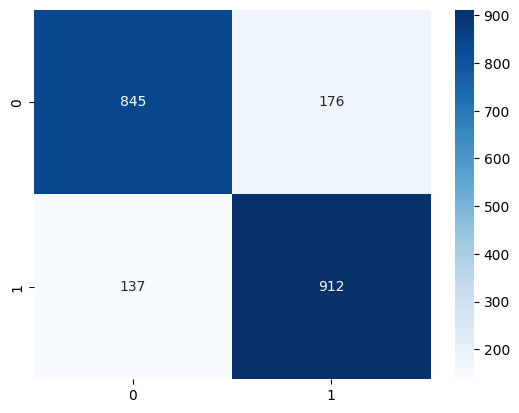

In [32]:
y_pred = lgb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

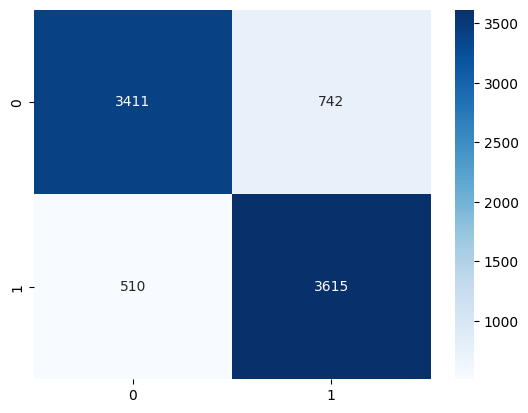

In [33]:
X_pred = lgb.predict(X_train)

cm1 = confusion_matrix(y_train, X_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.show()

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1021
           1       0.84      0.87      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



In [35]:
print('Training Accuracy',accuracy_score(y_train, X_pred)*100)
print('Testing Accuracy',accuracy_score(y_test, y_pred)*100)

Training Accuracy 84.87557381009906
Testing Accuracy 84.8792270531401
